In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def seasonal_model(
    x_prev: np.matrix,
    W: float,
    G: np.matrix,
    F: np.matrix,
    V: float,
    FREQUENCY: int,
):
    w = np.zeros(FREQUENCY)
    w[0] = 1
    w = np.matrix(w.T)
    x = G @ x_prev + w
    y = F @ x + V

    return x, y 

In [0]:
FREQUENCY = 12

In [0]:
x = np.matrix(np.random.randn(12)).T

In [0]:
G = np.ones([FREQUENCY, FREQUENCY])
G -= np.triu(G, k=0)
G -= np.triu(np.ones([FREQUENCY, FREQUENCY]), k=2).T
G[0] = -1
G = np.matrix(G)

In [166]:
G

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]])

In [0]:
W = 1
V = 1

In [0]:
F = np.matrix(np.eye(FREQUENCY)[0])

In [170]:
F

matrix([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [0]:
x_hist = [x]
y_hist = []

In [0]:
for i in range(100):
    x, y = seasonal_model(
        x_hist[-1],
        W, G, F, V,
        FREQUENCY
    )
    x_hist.append(x)
    y_hist.append(y)

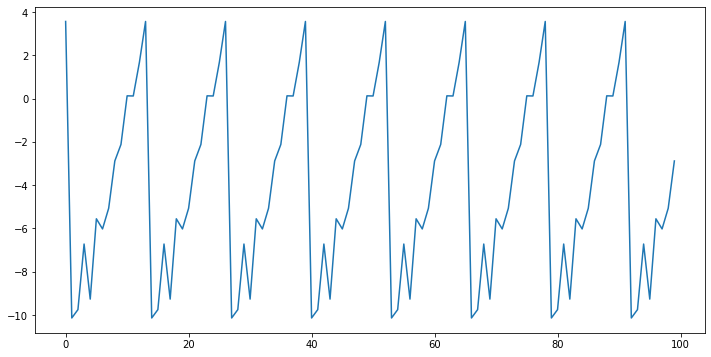

In [173]:
plt.figure(figsize=(12, 6))
plt.plot([y[0, 0] for y in y_hist])